In [37]:
import pandas as pd

In [49]:
df = pd.read_csv('Pizza_Sale.csv')

In [43]:
df = df.drop(columns='Unnamed: 0')

In [50]:
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [35]:
def date_taime(text):
    try:
        return pd.to_datetime(text, format="%d-%m-%Y")
    except ValueError:
        try:
            return pd.to_datetime(text, format="%d/%m/%Y")
        except ValueError:
            return pd.NaT
df['order_date'] = df['order_date'].apply(date_taime)

df.dropna(inplace= True)

In [46]:
df.to_csv('Pizza_Sale.csv',index=False)

In [ ]:
df = df.groupby(['pizza_name_id','order_date'])['quantity'].sum().reset_index()

In [31]:
df['order_date'].index

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

RangeIndex(start=0, stop=22945, step=1)


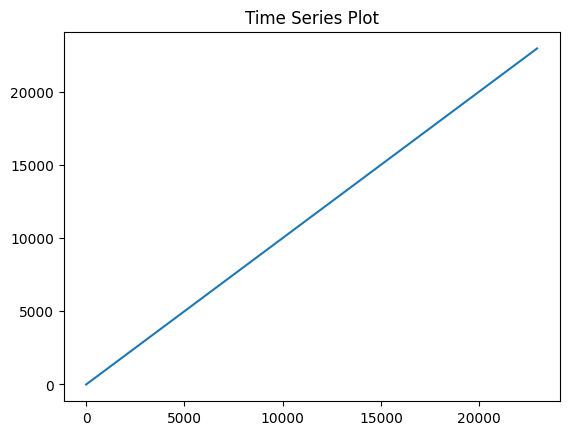

In [24]:
import matplotlib.pyplot as plt

plt.plot(df)
plt.title("Time Series Plot")
plt.show()


In [26]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df)
print("ADF Statistic:", result[0])
print("p-value:", result[1])


ADF Statistic: 74.1413700603379
p-value: 1.0
